# Guided Project: Finding Heavy Traffic Indicators on I-94




## introdução
Nesse projeto focaremos na visualizacao de dados explanatoria, utilizando dos conceitos aprendidos no curso "Data Visualization Fundamentals" pela plataforma [dataquest](https://www.dataquest.io/). Iremos analisar o dataset  sobre o  tráfego da [Rodovia Interestadual I-94](https://en.wikipedia.org/wiki/Interstate_94). Vamos usar este [dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

O objetivo de nossa analise é determinar indicadores de tráfego lento na I-94. Esses quais podem ser condicoes climaticas, periodo do dia, hora da semana, etc. Por exemplo podmeos achar um tráfego mais pesado no verão ou quando neva. 

In [1]:
import numpy as np
import pandas as pd

traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Análise das colunas 
Nenhuma das colunas apresentam valores nulos, temos dos tipos object float64 e int64.
Segundo a documentação temos as seguintes descrições para cada coluna:
* holiday: feriados nacionais dos EUA e regionais do estado de Minnesota.
* temp: media de temperatura em kelvin.
* rain_1h: total de chuva por hora em mm.
* snow_1h: total de neve por hora em mm.
* clouds_all: porcentagem de nebulosidade.
* wheather_main: curta descricao textual do clima atual.
* wheater_description: longa descricao textual do clima atual.
* date_time: horario local em DateTime. 
* traffic_volume: volume do tráfego a cada hora no sentido oeste.

### Mais sobre o dataset
Na documentação do dataset menciona que a estação que recorda os dados esta entre minneapolis e Saint Paul, a estação apenas registra o sentido oeste (carros que vão do leste para o oeste).

isso significa que nodda análise sera sobre o sentido oeste nas proximidades da estaçao, entao devemos evitar generalizações dos nossos resultados para toda a I-94.

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


<AxesSubplot:ylabel='Frequency'>

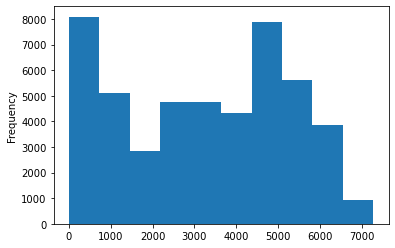

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

print(traffic["traffic_volume"].describe())

traffic["traffic_volume"].plot.hist()

Encontramos uma media de 3259.81, máxima de 7280 e mínima de 0 carros por hora.

## Volume do tráfego: dia vs noite
o horario do dia certamente impacta nesses dados, vamos separá-los para termos maior clareza na análise. Vamos considerar a parte do dia apartir 7 horas até 19 horas, e a noite apartir das 19 até as 7 horas.


In [5]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

print(traffic["date_time"])

daytime = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour <19)]  

nighttime = traffic.copy()[(traffic["date_time"].dt.hour >= 19) | (traffic["date_time"].dt.hour < 7)]

print(daytime.shape)
print(nighttime.shape)

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]
(23877, 9)
(24327, 9)


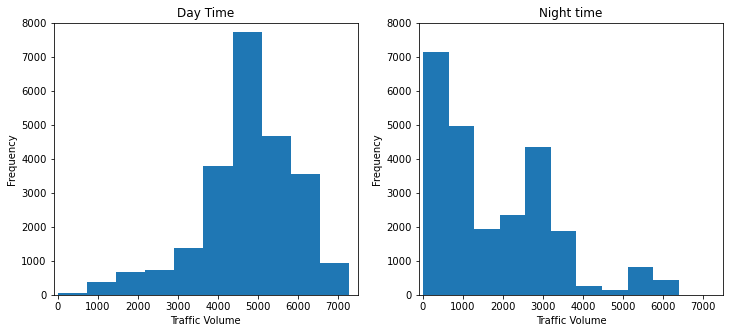

In [6]:
plt.figure(figsize=(12,5))

# day plot 
plt.subplot(1,2,1)
plt.hist(daytime["traffic_volume"])
plt.title("Day Time")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(-100,7500)
plt.ylim(0,8000)

# night plot
plt.subplot(1,2,2)
plt.hist(nighttime["traffic_volume"])
plt.title("Night time")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(-100,7500)
plt.ylim(0,8000)

plt.show()


pelos graficos temos que a uma distribuicao predominantemente skewed, negativa no Day time e positiva no Night time. isso indica que com o passar do tempo o tráfego aumenta (day time), e com o passar do tempo o tráfego diminui (Night time).

a parte da noite se mostra muito mais leve comparado ao periodo do dia, como nosso objetivo é encontrar indicador de tráfego pesado, apartir de agora iremos focar nos dados do `daytime`. 

## Indicadores de tempo

um dos possíveis indicadores de tráfego pesado é o tempo. pode haver mais pessoas na estrada em certo mês, dia ou hora do dia.

vamos olhar alguns gráficos que mostram o tráfego com base no:
* mês
* dia da semana
* hora do dia

AxesSubplot(0.125,0.125;0.775x0.755)


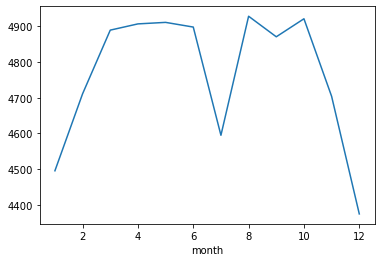

In [7]:
daytime["month"]= daytime["date_time"].dt.month
by_month = daytime.groupby("month").mean()
print(by_month["traffic_volume"].plot.line())

O tráfego se mostra mais leve nos meses de novembro a fevereiro, e mais pesado nos meses de março a outubro, com exceção do mês de julho onde temos uma diferença muito grande. 

para melhor entendermos o porque disso, vamo ver como o trafégo de mes de julho mudou ao longo dos anos. 

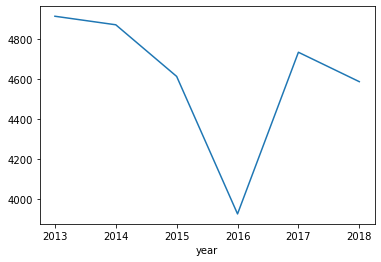

In [8]:
daytime['year'] = daytime['date_time'].dt.year
only_july = daytime[daytime['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Normalmente o tráfego é lento no mes de julho, a unica excecao é que em 2016 teve uma grande queda no volume de tráfego. 

Uma das possiveis razoes para isso é a cosntrucao de uma estrada oque causou o fechamento da rodovia no sentindo oeste. como relata essa [notícia](https://www.mlive.com/news/ann-arbor/2016/06/road_construction_projects_tha.html)

Com isso temos que os messes mais quentes (março a outubro) geralmente tem tráfego mais lento que  comparado a messes mais frios (novembro a fevereiro). em um mes mais quente voce pode esperar a cada hora um volume de carros proximo aos 5,000.

## indicadores de tempo II

agora vamos mais afundo ver os valores baseados no dia da semana.

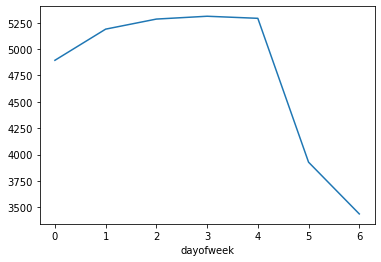

In [9]:
daytime["dayofweek"] = daytime["date_time"].dt.dayofweek
by_dayofweek = daytime.groupby("dayofweek").mean()
by_dayofweek["traffic_volume"].plot.line()
plt.show()

nos dias úteis (seg a sex) vemos uma media de proxima de 5 mil carros por dia, enquanto nos finais de semana esse numero é abaixo dos 4 mil carros por hora. 


## Indicadores de tempo III

Para os valores baseados na hora do dia, os finais de semana irão diminuir os valores das médias, entao vamos ver as médias separadas.

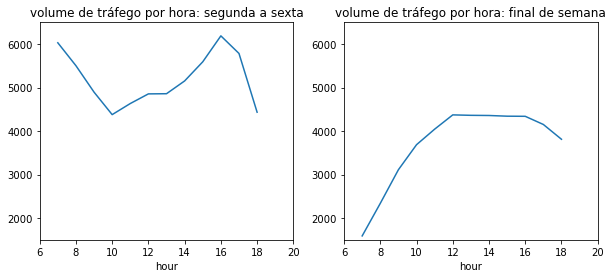

In [10]:
daytime["hour"] = daytime["date_time"].dt.hour
bussiness_days = daytime.copy()[daytime["dayofweek"] <= 4]
weekends_days = daytime.copy()[daytime["dayofweek"] >= 5]
by_hours_buss = bussiness_days.groupby("hour").mean()
by_hours_weekend = weekends_days.groupby("hour").mean()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
by_hours_buss["traffic_volume"].plot.line()
plt.title("volume de tráfego por hora: segunda a sexta")
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.subplot(1,2,2)
by_hours_weekend["traffic_volume"].plot.line()
plt.title("volume de tráfego por hora: final de semana")
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.show()

           
#print(by_hours_buss["traffic_volume"])
#print(by_hours_weekend["traffic_volume"])

o tráfego a cada hora é geralmente alto durante os dias uteis comparado aos finais de semana. como esperado a hora do rush é perto das 7 e as 16 horas quando a maioria das pessoa dirigem para o trabalho e voltam pra casa, podemos ver volumes acima dos 6 mil carros. 

para sintetizar as informacoes ate aqui temos que:
* o tráfego é normalmente mais lento nos meses mais quentes (março a outubro) quando comparado a mesees de temperatura mais amena (novembro a fevereiro)
* o tráfego é mais lento nos dias uteis do que nos finais de semana
* nos dias uteis o horario mais movimentado é entre 7 e 16 horas.


## indicadores de clima

outra possibilidade de indicador de tráfego lento é o clima. o dataset nos dispoem algumas colunas sobre o clima: `temp`, `rain_lh`,`clouds_all`, `weather_main`, `weather_description`.

algumas dessas colunas sao numericas entao vamos começar olhando a correlacao entre elas e `traffic_volume`.





In [11]:
daytime.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

 a temperatura mostra a correlacao mais forte com 0.12+. as outras colunas relevantes (`rain_1h`,`snow_1h`, `clouds_all`) nao demonstram nemhuma correlacao forte com o `traffic_volume`.
 
 

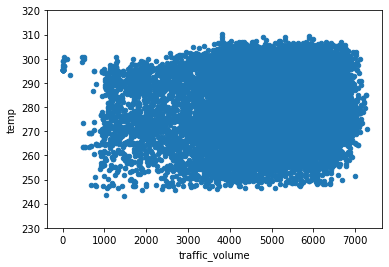

In [12]:
daytime.plot.scatter("traffic_volume","temp")
plt.ylim(230,320)
plt.show()

podemos concluir que a temperatura nao aparenta ser um indicador forte de tráfego pesado..
vamos ver agora outras colunas com relacao ao clima: `weather_main` e `weather_description`

                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         283.812078  0.000000  0.000000    1.670265     4778.416260   
Clouds        282.929274  0.000000  0.000000   62.667548     4865.415996   
Drizzle       284.456433  0.170804  0.000000   84.704417     4837.212911   
Fog           277.579641  0.163840  0.001409   65.477901     4372.491713   
Haze          275.319353  0.040036  0.000000   64.000000     4609.893285   
Mist          279.420825  0.249992  0.000825   74.961435     4623.976475   
Rain          287.089601  3.972943  0.000292   75.870116     4815.568462   
Smoke         292.405833  0.878333  0.000000   53.333333     4564.583333   
Snow          267.984505  0.014017  0.001768   80.501376     4396.321183   
Squall        296.730000  1.020000  0.000000   75.000000     4211.000000   
Thunderstorm  293.364678  1.146475  0.000000   75.184035     4648.212860   

           

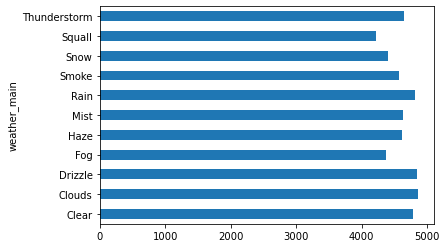

In [13]:
by_weather_main = daytime.groupby('weather_main').mean()
print(by_weather_main)
by_weather_main['traffic_volume'].plot.barh()
plt.show()

<AxesSubplot:ylabel='weather_description'>

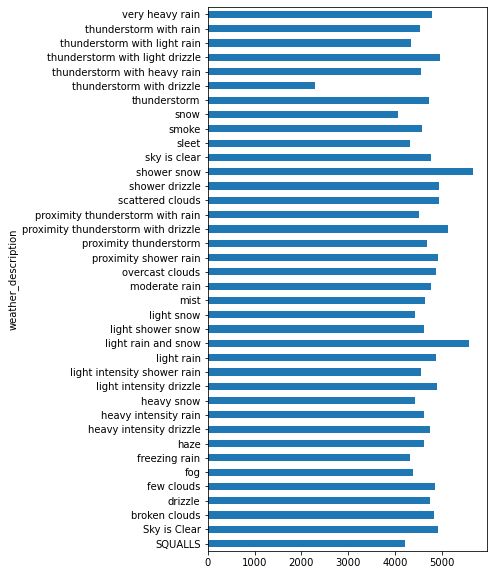

In [14]:
by_weather_description = daytime.groupby("weather_description").mean()
by_weather_description["traffic_volume"].plot.barh(figsize=(5,10))

temos que tres tipos de clima o volume do tráfego ultrapassa ou chega perto dos 5,000:
* Shower snow
* Light rain and snow
* thunderstorm with drizzle

Não está tão claro porque esse clima tem as maiores médias de volume de tráfego (são tempo ruims mas não os piores). possivelmente mais pessoas usam o carro quando o tempo esta ruim ao invés de usar bicicleta ou caminhar.

## conclusão

Nesse projeto tentamos achar indicadores de tráfego lento na rodovia interestadual I-94. Nos focamos em encontrar dois tipos de indicadores:

* indicadores de tempo:
    * o tráfego é normalmente mais lento nos meses mais quentes (março a outubro) quando comparado a mesees de temperatura mais amena (novembro a fevereiro)
    * o tráfego é mais lento nos dias uteis do que nos finais de semana
    * Nos dias úteis o horário mais movimentado é entre 7 e 16 horas.
    
* indicadores de clima:
    * shower snow 
    * light rain and snow
    * Proximity thunderstorm with drizzle
